### This Models helps in predicting the Payload consumption on a daily basis.
### We have PAN-India Payload data which is in Peta-Byte.
### Data has payload trend for 352 days. (i.e. 3 March'21 to 19 Apr'22)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [16]:
df = pd.read_excel("Payload_prediction.xlsx")

# take a look at the dataset
df.head()

,Date,Day_no,Payload_PB
0,2021-05-03 00:00:00,1,124.253995
1,2021-05-04 00:00:00,2,125.646753
2,2021-05-05 00:00:00,3,125.491782
3,2021-05-06 00:00:00,4,126.896810
4,2021-05-07 00:00:00,5,125.191482


In [17]:
df.describe()

,Day_no,Payload_PB
count,352.000000,352.000000
mean,176.500000,133.198170
std,101.757883,5.816662
min,1.000000,123.175762
25%,88.750000,129.128591
50%,176.500000,130.916966
75%,264.250000,137.971289
max,352.000000,147.909351


In [18]:
cdf = df[['Day_no','Payload_PB']]
cdf.head(9)

,Day_no,Payload_PB
0,1,124.253995
1,2,125.646753
2,3,125.491782
3,4,126.896810
4,5,125.191482
5,6,126.303777
6,7,126.398615
7,8,125.695290
8,9,128.826795


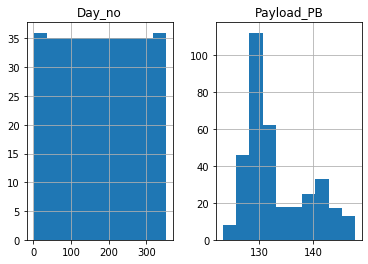

In [19]:
cdf.hist()
plt.show()

# Now, lets plot Day no. vs the Payload, to see how linear is their relation:

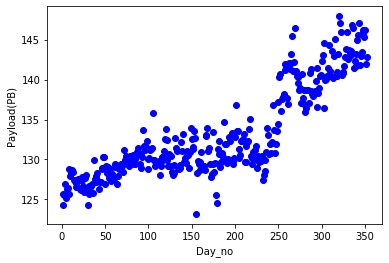

In [20]:
plt.scatter(cdf.Day_no,cdf.Payload_PB,color='blue')
plt.xlabel("Day_no")
plt.ylabel("Payload(PB)")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [21]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

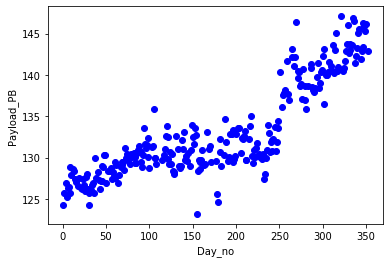

In [22]:
plt.scatter(train.Day_no, train.Payload_PB,  color='blue')
plt.xlabel("Day_no")
plt.ylabel("Payload_PB")
plt.show()

#### Modeling
Using sklearn package to model data.

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Day_no']])
train_y = np.asanyarray(train[['Payload_PB']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.04805773]]
Intercept:  [124.72023337]


In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
test_x = np.asanyarray(test[['Day_no']])
test_y = np.asanyarray(test[['Payload_PB']])
regr.fit (test_x, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.05344261]]
Intercept:  [123.71560934]


__Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 

#### Plot Outputs

#### we can plot the fit line over the data

Text(0, 0.5, 'Payload_PB')

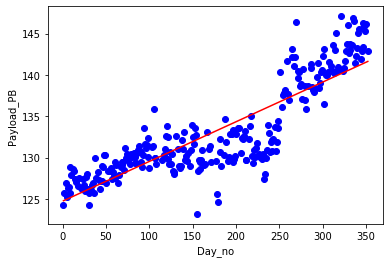

In [26]:
plt.scatter(train.Day_no, train.Payload_PB,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Day_no")
plt.ylabel("Payload_PB")

Text(0, 0.5, 'Payload_PB')

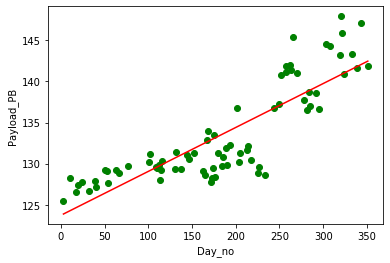

In [30]:
plt.scatter(test.Day_no, test.Payload_PB,  color='green')
plt.plot(test_x, regr.coef_[0][0]*test_x + regr.intercept_[0], '-r')
plt.xlabel("Day_no")
plt.ylabel("Payload_PB")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Day_no']])
test_y = np.asanyarray(test[['Payload_PB']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 2.53
Residual sum of squares (MSE): 10.02
R2-score: 0.60
